In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. 열 이름 변경 

In [3]:
# 특정 칼럼명 'old_column'을 'new_column'으로 변경
df = df.rename(columns={'BMI': '비엠아이'})

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,비엠아이,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# DataFrame 데이터에 특정 인덱스에 열 삽입 

In [ ]:
df.insert(1, 'Sex', sex_column) # 1번째 열에 'Sex' 란 이름의 칼럼 삽입. sex_column 은 행 데이터 

## 특정 조건의 행만 가져오기 

In [7]:
df_n = df[df['Glucose']==148]
df_n 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,비엠아이,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
166,3,148,66,25,0,32.5,0.256,22,0
199,4,148,60,27,318,30.9,0.150,29,1
458,10,148,84,48,237,37.6,1.001,51,1


# 원 핫 인코딩 

In [9]:
y = df['Outcome'] 

## 1. get_dummies 

In [10]:
Y = pd.get_dummies(y).values # 여기서 y는 변환할 레이블 => 문자, 정수 모두 가능 
print(Y) 

[[False  True]
 [ True False]
 [False  True]
 ...
 [ True False]
 [False  True]
 [ True False]]


## 2. to_categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)  # 4부터 시작하도록 조정
y_test = to_categorical(y_test)

print(y_train)

## 정규화 

## Z-score 정규화 : 평균 0, 표준편차 1을 따르는 정규분포로 바꿈 

## 레이블 값은 정규화 X 

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# StandardScaler 객체 생성
scaler = StandardScaler()

# 레이블값 삭제 
X = df.drop('Outcome', axis=1) 

# 데이터에 정규화 적용 (각 열에 대해 Z-score 계산)
scaled_data = scaler.fit_transform(X)

# 정규화된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

In [23]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,비엠아이,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


C:\Users\tansy\AppData\Local\Temp\ipykernel_16748\4271809971.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scaled_df.hist(ax = ax)
C:\Users\tansy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tansy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50656 (\N{HANGUL SYLLABLE EM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tansy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tansy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


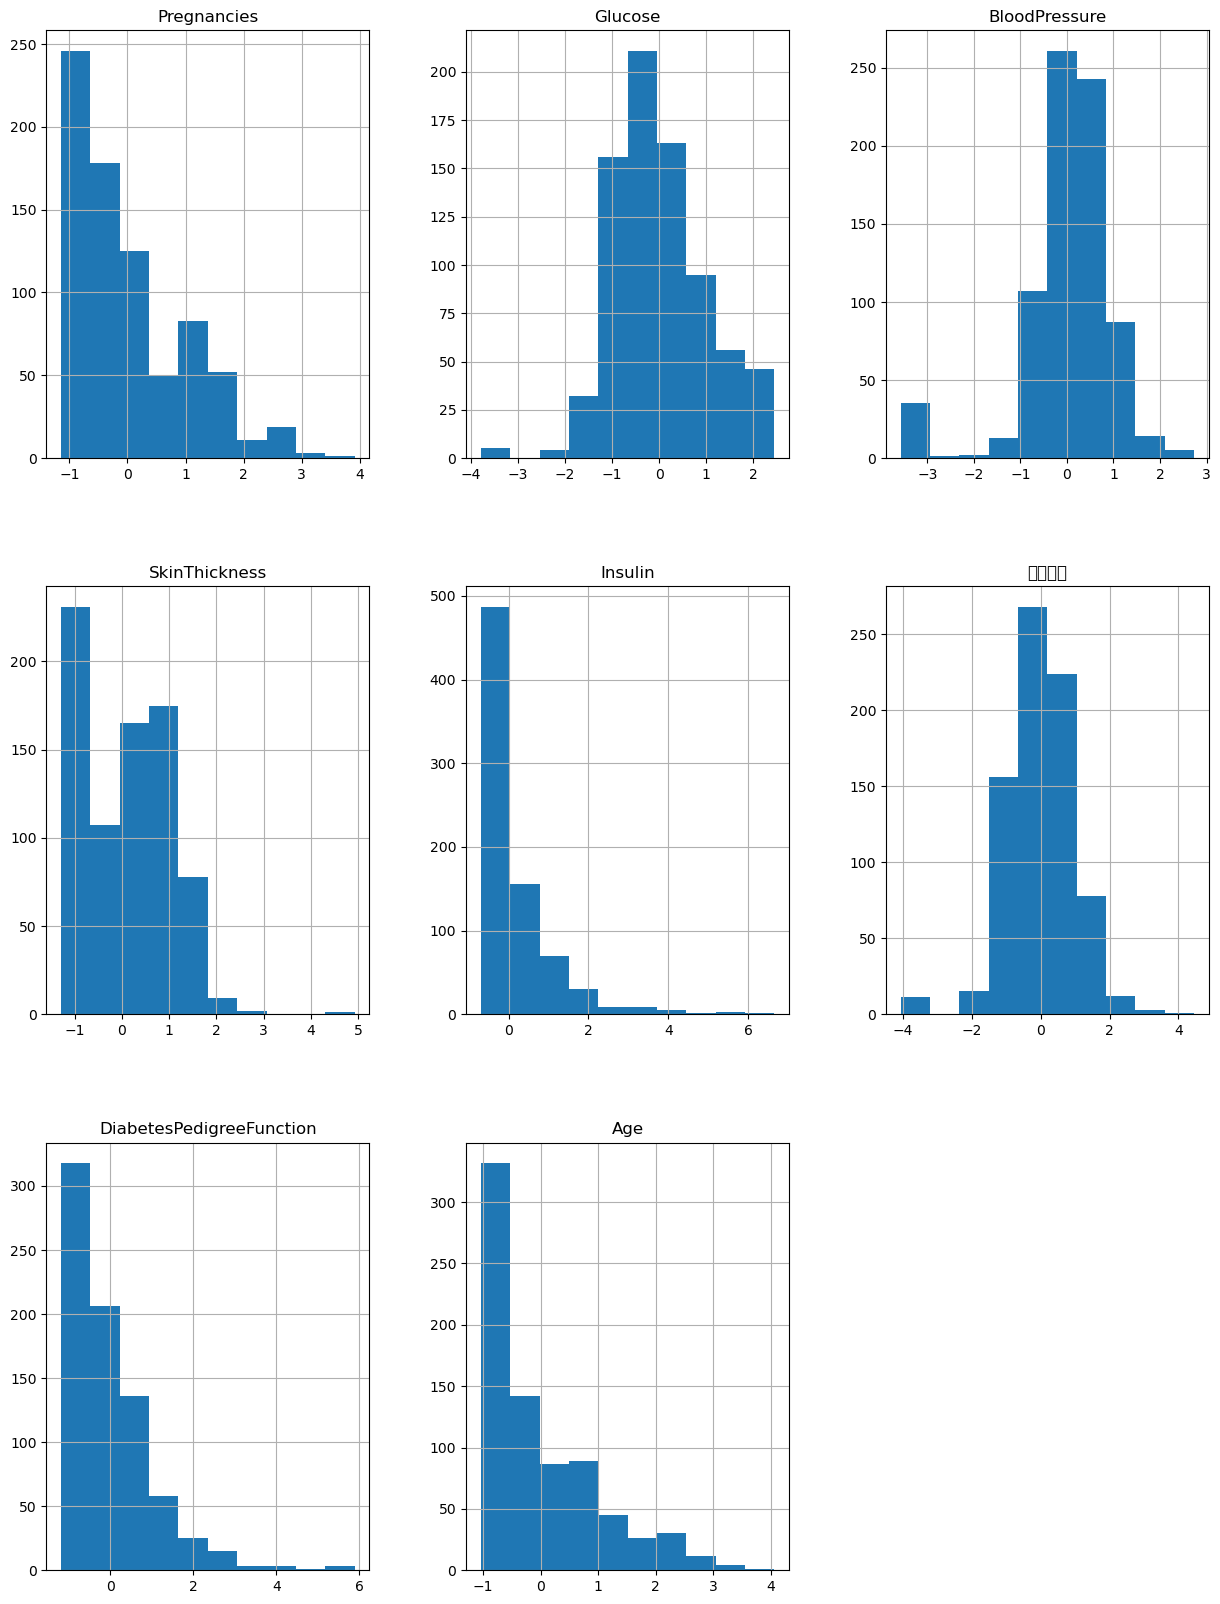

In [24]:
## 각 컬럼별 히스토그램 확인 

fig = plt.figure(figsize = (15,20))
ax = fig.gca() 
scaled_df.hist(ax = ax)
plt.show()

# 딥러닝 입력을 위해 DataFrame(칼럼 존재) => Numpy로 변환

In [ ]:
X = X.values 

# Numpy => DataFrame 으로 변환하기 

In [ ]:
# 정규화된 데이터를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)